Mid Term Project Digit Reogniser - Bulid a mode using Kaggle Dataset to recognise handwritten digits.

Loading required libraries

In [81]:
# Libraries for calculation
import pandas as pd
import numpy as np
import os

# Libraries for plotting
import seaborn as sns 
import matplotlib.pyplot as plt 
#Keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
#from keras.utils.np_utils import to_categorical
from keras.models import Sequential
#Sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split 

import tensorflow as tf
#from tensorflow import keras
import keras 

#Image Augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical


Functions for data loading data,Spliting data, Normalizing data

In [70]:
def datasplit(x,y):## spliting training and validation data
    x_train, x_validation, y_train, y_validation = train_test_split(x, y,test_size=.2,random_state=1)#spliting training data int
    return(x_train, x_validation, y_train, y_validation)
def dataload(filepath): ## function for reading file
    data=pd.read_csv(filepath)
    return data
 
def datapreprocess(data):
    y_transformed = keras.utils.np_utils.to_categorical(data.label, 10)
    num_im = data.shape[0]
    conv2d = data.values[:,1:]
    x_for_cnn = conv2d.reshape(num_im,28,28, 1)
    x_transformed = x_for_cnn / 255
    return x_transformed,y_transformed

Preapring the training data

In [71]:
filepath ="/content/drive/MyDrive/train.csv"
data=dataload(filepath)
x, y = datapreprocess(data)

Building the convolutional neural network


In [91]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))



model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 batch_normalization_20 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        102464    
                                                                 
 batch_normalization_21 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                      

Converting  one dimensional array 

In [87]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False, 
        vertical_flip=False)  # randomly flip images
print(x.shape)
datagen.fit(x)

(42000, 28, 28, 1)


In [88]:
x_train, x_validation, y_train, y_validation=datasplit(x,y)

Training of the  model

In [93]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
xm=datagen.flow(x,y, batch_size=86)
epochs = 35
batch_size = 86
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs=epochs,validation_data=[x_validation,y_validation])

Epoch 1/35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


391/391 [==============================] - 23s 56ms/step - loss: 0.0393 - accuracy: 0.9910 - val_loss: 0.0455 - val_accuracy: 0.9932
Epoch 2/35
391/391 [==============================] - 20s 52ms/step - loss: 0.0439 - accuracy: 0.9902 - val_loss: 0.0418 - val_accuracy: 0.9923
Epoch 3/35
391/391 [==============================] - 21s 55ms/step - loss: 0.0459 - accuracy: 0.9896 - val_loss: 0.0434 - val_accuracy: 0.9907
Epoch 4/35
391/391 [==============================] - 20s 52ms/step - loss: 0.0367 - accuracy: 0.9909 - val_loss: 0.0383 - val_accuracy: 0.9924
Epoch 5/35
391/391 [==============================] - 21s 53ms/step - loss: 0.0354 - accuracy: 0.9917 - val_loss: 0.0631 - val_accuracy: 0.9908
Epoch 6/35
391/391 [==============================] - 21s 53ms/step - loss: 0.0327 - accuracy: 0.9921 - val_loss: 0.0359 - val_accuracy: 0.9921
Epoch 7/35
391/391 [==============================] - 20s 51ms/step - loss: 0.0339 - accuracy: 0.9918 - val_loss: 0.0425 - val_accuracy: 0.9910
Epo

Prediction using trained model

In [82]:
model.save("Digit_Recognizer_model.h5")

ploting validation loss and accuraccy curves

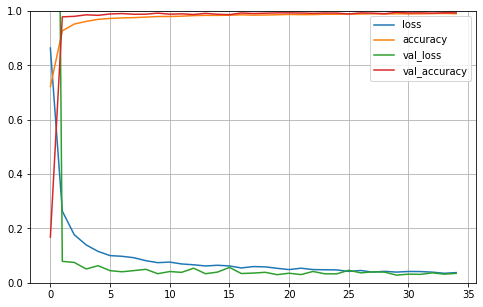

In [85]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Prediction and saving predicted data

In [98]:
path="/content/drive/MyDrive/test.csv"
data=dataload(path)
image_count= data.shape[0]
x_array = data.values[:,:]
gray_sclae = x_array.reshape(image_count,28,28, 1)
x_test = gray_sclae / 255
y_pred=model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)


In [99]:
finaldata= pd.DataFrame(y_pred)
finaldata.to_csv('out.csv')
finaldata.head()

,0
0,2
1,0
2,9
3,0
4,3
